# Getting started

This is a relatively simple notebook that gives instructions on setting up a conda environment for deconvolution, directions on how to get the tnia-python test image set, then performs a Richardson Lucy deconvolution on the bars image to confirm that the environment is set up properly and the test images are accessible.  

## Create a decon conda environment

In this environment we will install some tools we need for decon, this includes Jupyter noteook, opencl, fftw, clij2fft for non-circulant Richardson Lucy, devbio version of Napari for visualization, sdeconv for theoretical PSF, tnia-python XYZ projected figures in the notebook. 

    conda create --name decon-env python=3.9
    conda activate decon-env
    pip install devbio-napari
    pip install napari-sdeconv
    pip install git+https://github.com/True-North-Intelligent-Algorithms/tnia-python
    pip install --index-url https://test.pypi.org/simple/ --no-deps clij2-fft

Mac-users may also need to install this:

    conda install -c conda-forge ocl_icd_wrapper_apple

Linux users may also need to install this:

    conda install -c conda-forge ocl-icd-system

## Get and open test images

1.  Get the tnia-python-images image collection https://www.dropbox.com/scl/fo/ir7g1bz4w0bbjbskbq5ng/h?dl=0&rlkey=zdbven69fvd60za8wt49fd0w9
2.  In the code snippet below change ```im_path``` to the local location on your machine where you put the above folder
3.  Use imread to verify you can open the image, then print the size of the image and verify it is is ```(128,256,256)```

In [1]:
from skimage.io import imread

im_path=r"D:\images\tnia-python-images\deconvolution\bars\\"
im_name='Bars-G10-P15-stack.tif'
psf_name='PSF-Bars-stack.tif'
truth_name='Bars-stack.tif'

im=imread(im_path+im_name)
psf=imread(im_path+psf_name)
truth=imread(im_path+truth_name)
im=im.astype('float32')

# normalize the PSF so that PSF energy is 1
psf=psf.astype('float32')
psf=psf/psf.sum()

# We also need to make sure the 'truth' and 'imaged' images have the same sum intensity (for some reason they do not).
truth=truth*(im.sum()/truth.sum())
print(im.sum())
print(truth.sum())
print(im.shape, psf.shape, truth.shape)

29587579000.0
29587578880.0
(128, 256, 256) (128, 256, 256) (128, 256, 256)


## View 3D Data in notebook

View the data using xy, xz, and zy max projections.  

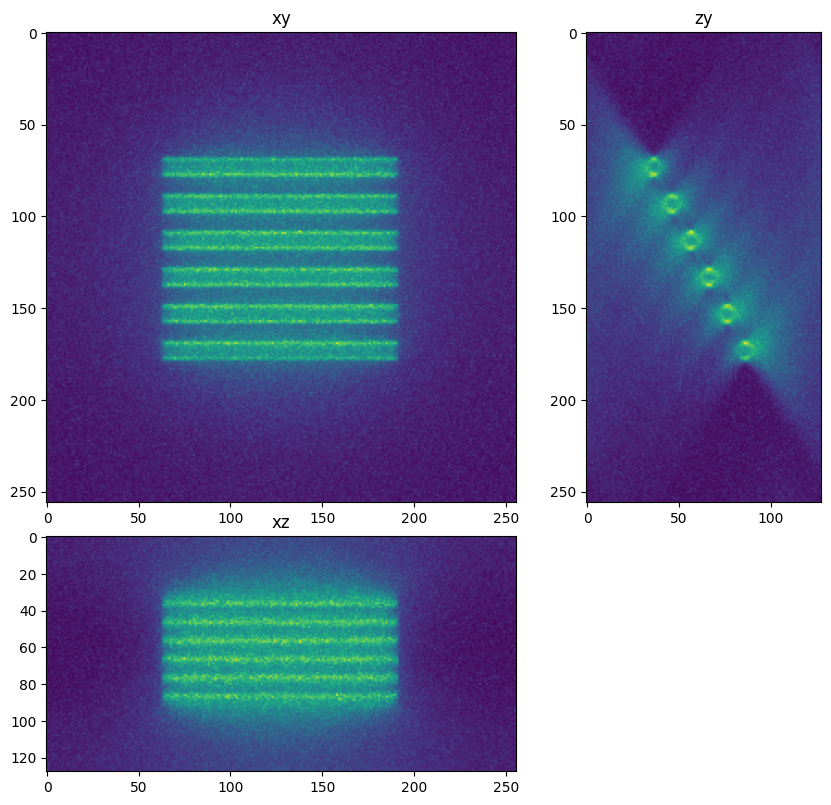

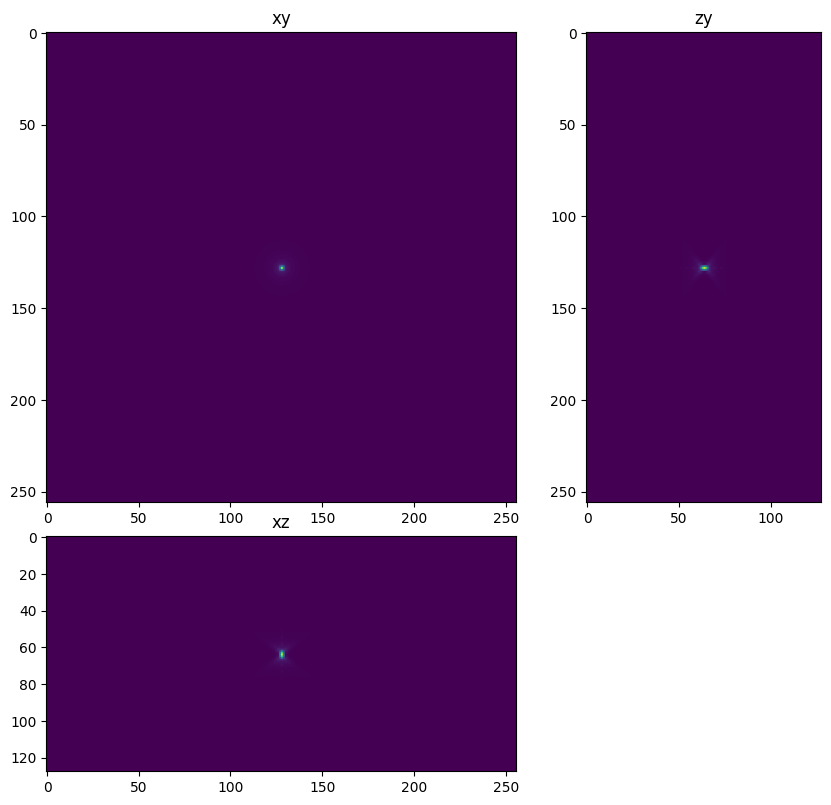

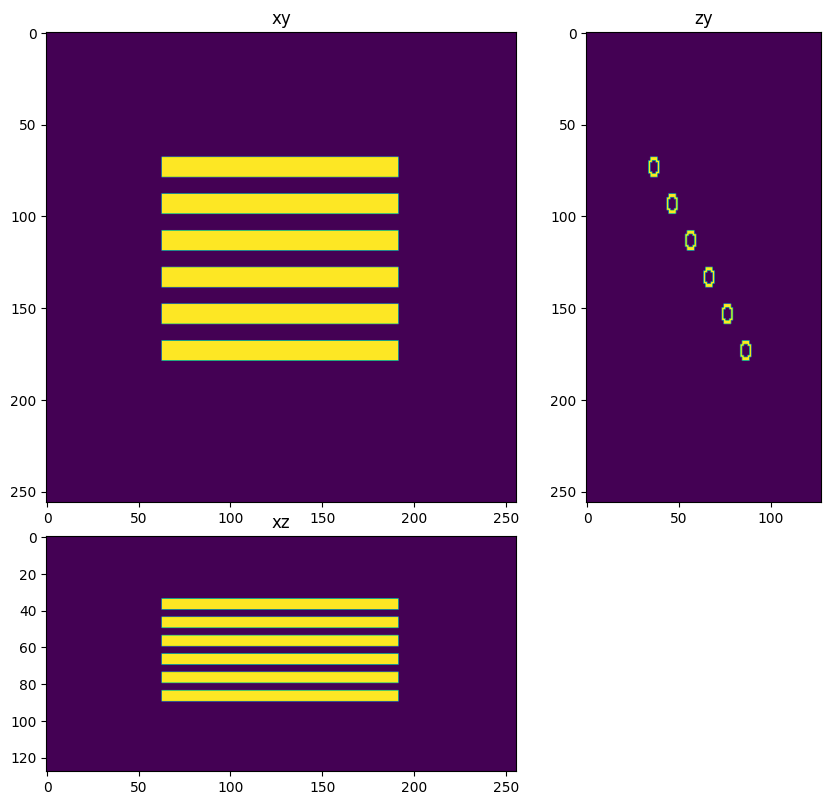

In [2]:
from tnia.plotting.projections import show_xyz_max, show_xyz_slice

fig=show_xyz_max(im)
fig=show_xyz_max(psf)
fig=show_xyz_max(truth)

## Import deconvolution libraries

Try importing the clij2 and redlionfish implementations of Richardson Lucy.  If they are found perform a deconvolution with each library

In [3]:
try:
    from clij2fft.richardson_lucy import richardson_lucy_nc
    clij2_rl_found=True
    
except ImportError:
    clij2_rl_found=False
try:
    import RedLionfishDeconv as rl
    redlionfish_rl_found=True
except ImportError:
    redlionfish_rl_found=False
    
print('clij2 rl found',clij2_rl_found)
print('redlionfish rl found',redlionfish_rl_found)   

clij2 rl found True
redlionfish rl found True


## Deconvolve and visualize in notebook

get lib
get lib


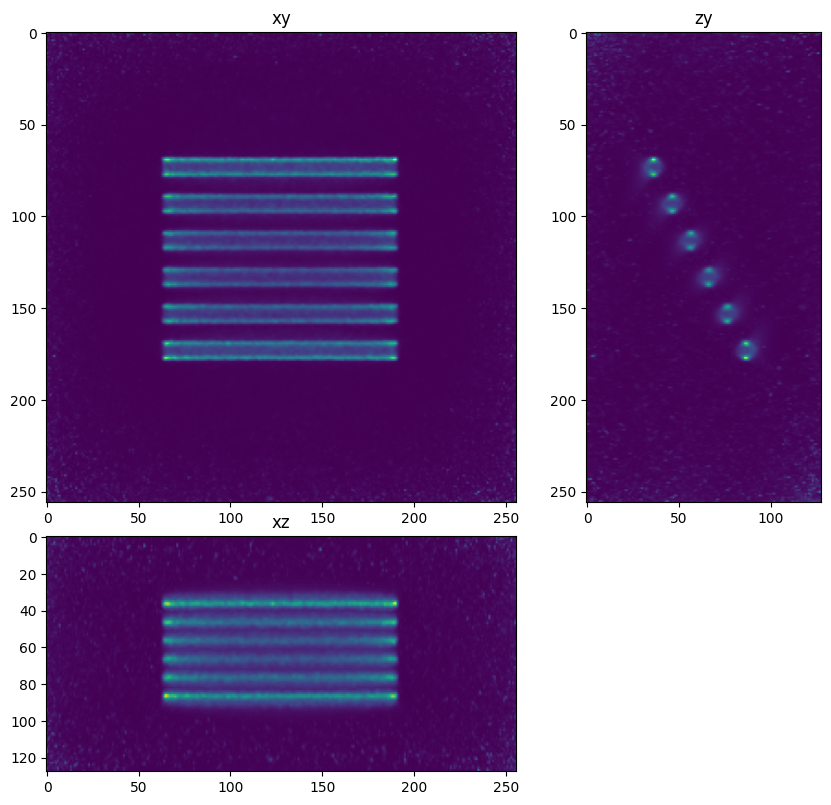

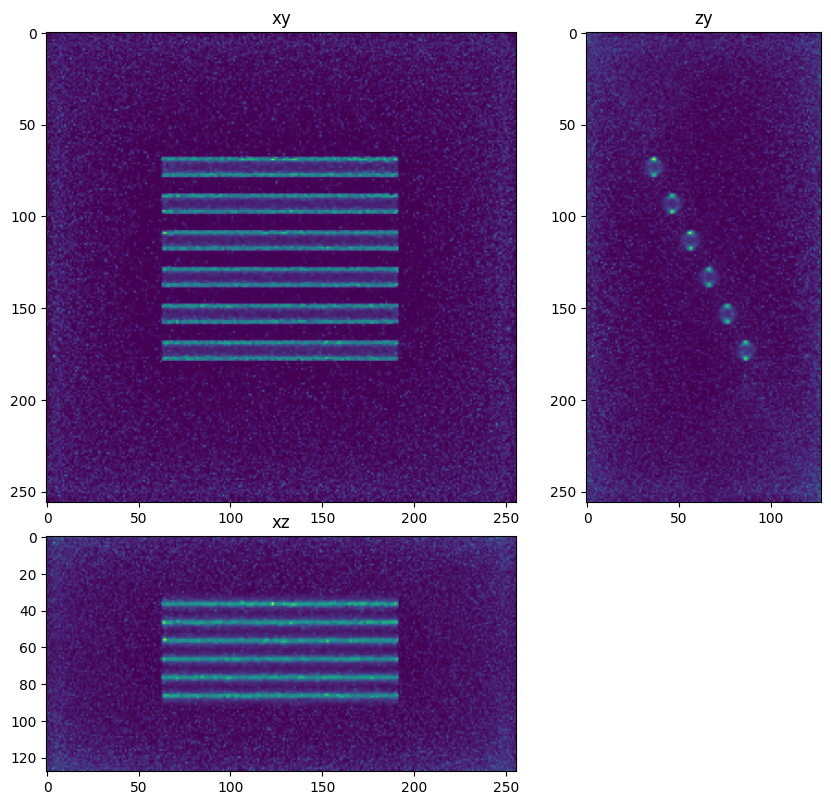

In [4]:
decon100=richardson_lucy_nc(im,psf,100,0.0002)
decon1000=richardson_lucy_nc(im,psf,1000,0.0002)

fig=show_xyz_max(decon100)
fig=show_xyz_max(decon1000)

In [5]:
pip install nbvv

     ---------------------------------------- 3.0/3.0 MB 7.6 MB/s eta 0:00:00
     -------------------------------------- 271.6/271.6 kB 8.4 MB/s eta 0:00:00
  Using cached jsonpointer-2.3-py2.py3-none-any.whl (7.8 kB)
  Using cached rfc3986_validator-0.1.1-py2.py3-none-any.whl (4.2 kB)
  Using cached uri_template-1.2.0-py3-none-any.whl (10 kB)
  Using cached webcolors-1.12-py3-none-any.whl (9.9 kB)
  Using cached fqdn-1.5.1-py3-none-any.whl (9.1 kB)
  Using cached rfc3339_validator-0.1.4-py2.py3-none-any.whl (3.5 kB)
  Using cached isoduration-20.11.0-py3-none-any.whl (11 kB)
  Using cached arrow-1.2.3-py3-none-any.whl (66 kB)
Note: you may need to restart the kernel to use updated packages.


In [10]:
import nbvv
nbvv.volshow(decon100, channel_names=["decon"])

VolumeWidget(dimensions={'tile_width': 170, 'tile_height': 186, 'rows': 11, 'cols': 12, 'atlas_width': 2040, '…